In [35]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind

In [36]:
#Reading CSVs
m_data = pd.read_csv('Environment_Temperature_change_filtered_Mdata.csv')
y_data = pd.read_csv('Environment_Temperature_change_filtered_Ydata.csv')
#Dropping unncessary columns (Meteorlogical Year)
y_data1 = y_data.drop(['Area Code','Months Code','Element Code','Element','Unit','Area','Months'], axis=1)
#Meteorlogical Year Mean Temperature Changes (Transposed)
y_data2 = y_data1.transpose()
y_data2.columns = ['South America','Northern America']
y_data2 = y_data2.drop(['YearSpanAvg'], axis=0)
#y_data2

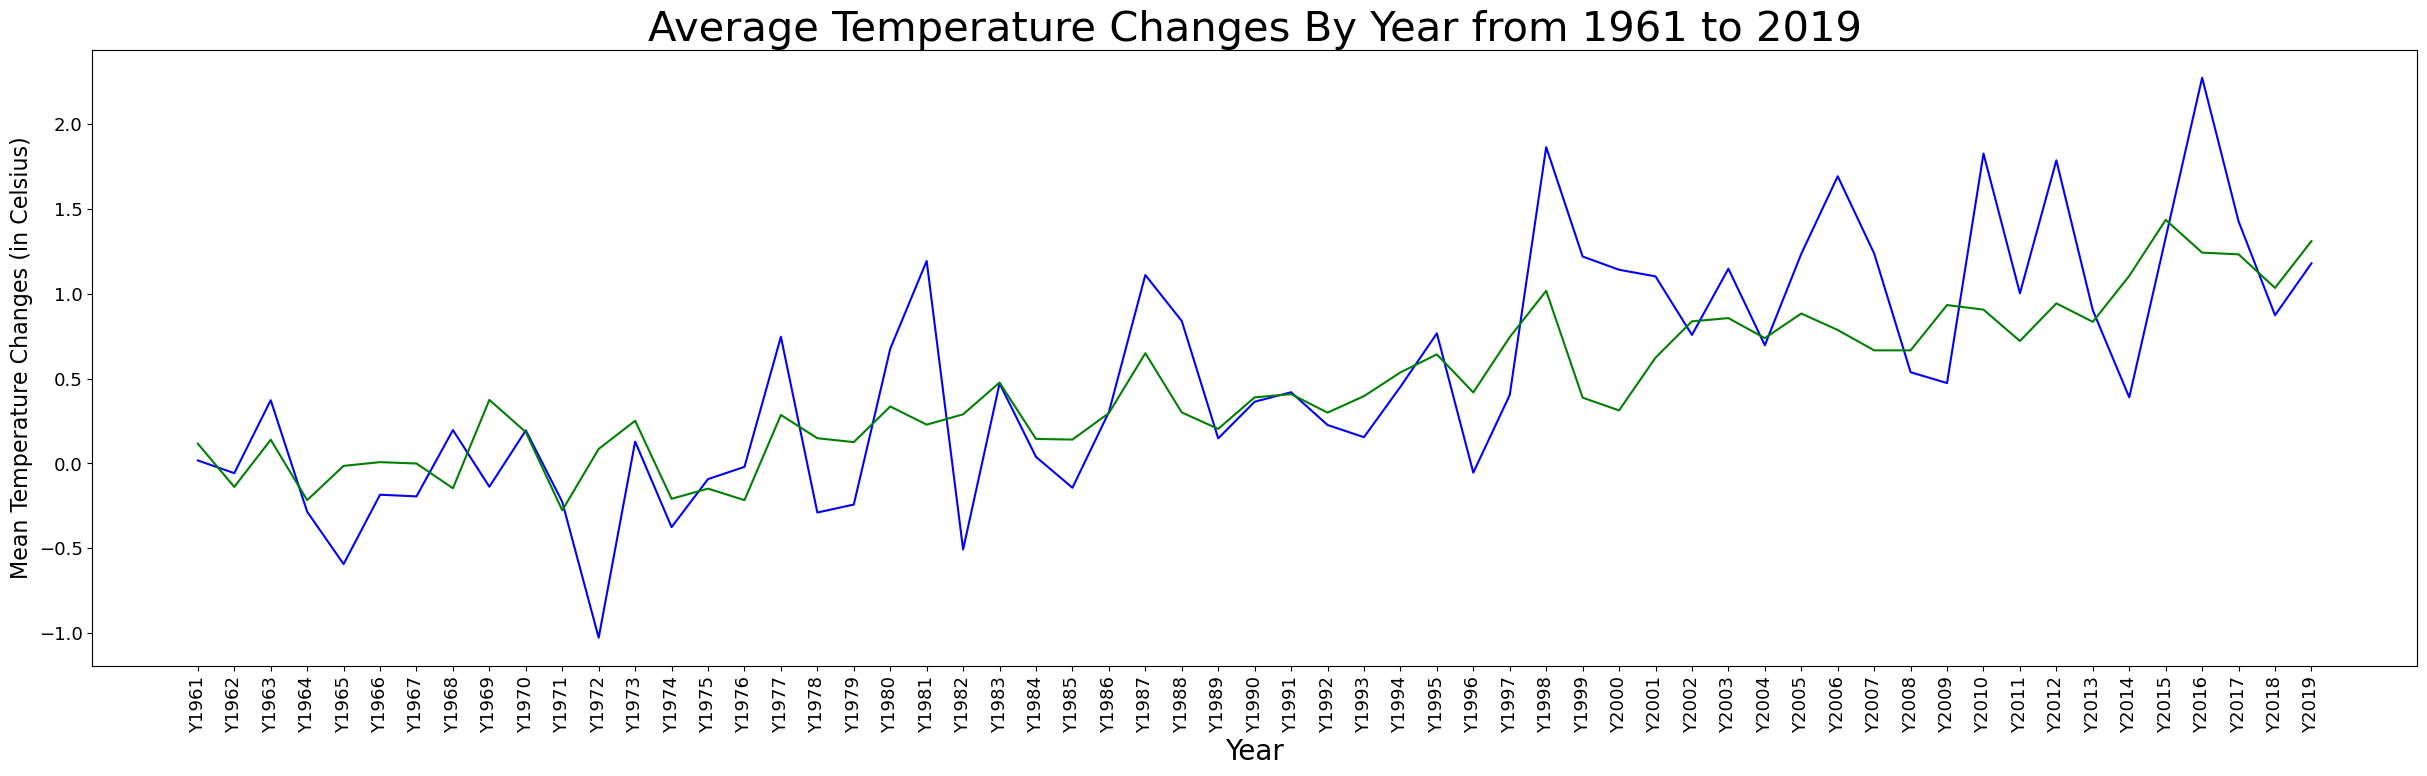

In [39]:
#Plot Meteorological year (should evaluate w linear regression)
fig = plt.figure(figsize=(30, 8))
plt.plot(y_data2['Northern America'],color='blue')
plt.plot(y_data2['South America'],color='green')
plt.xlabel('Year', fontsize = 20)
plt.ylabel("Mean Temperature Changes (in Celsius)", fontsize = 16)
plt.title("Average Temperature Changes By Year from 1961 to 2019", fontsize = 30)
plt.xticks(fontsize=13)
plt.xticks(rotation=90)
plt.yticks(fontsize=13)
plt.show()

In [40]:
#Isolated NA from y_data2 for linear regression
#fig = plt.figure(figsize=(30, 8))
#plt.plot(y_data2['Northern America'])
#plt.xlabel('Years', fontsize = 16)
#plt.ylabel("Mean Temperature Changes (in Celsius)", fontsize = 16)
#plt.title("Average Temperature Change By Meteorological Year 1961 to 2019 (NA)", fontsize = 30)
#plt.xticks(rotation=90)
#plt.show()
#Regression

The equation of the line is: y = 0.03x + -59.20


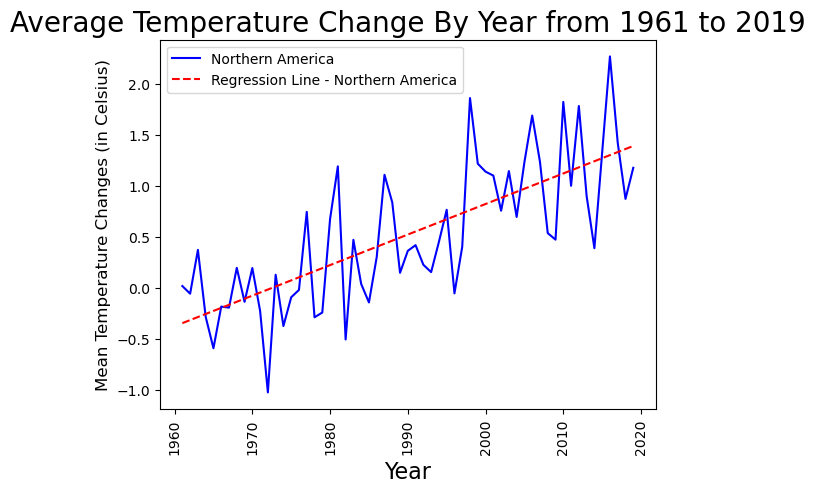

In [41]:
# Convert the 'Year' column to integers by removing the 'Y' prefix
y_data2['Year'] = y_data2.index.str.replace('Y', '').astype(int)

# Plot the data points for 'Northern America'

plt.plot(y_data2['Year'], y_data2['Northern America'], label='Northern America', color='blue')

# Linear regression for 'Northern America'
X = y_data2['Year'].values.reshape(-1, 1)
y1 = y_data2['Northern America'].values
regressor1 = LinearRegression()
regressor1.fit(X, y1)
m1 = regressor1.coef_[0]
b1 = regressor1.intercept_

# Print the equation of the line
print(f"The equation of the line is: y = {m1:.2f}x + {b1:.2f}")

y1_pred = regressor1.predict(X)

plt.plot(y_data2['Year'], y1_pred, label='Regression Line - Northern America', color='red', linestyle='dashed')
plt.xlabel('Year', fontsize = 16)
plt.ylabel("Mean Temperature Changes (in Celsius)", fontsize = 12)
plt.title("Average Temperature Change By Year from 1961 to 2019", fontsize = 20)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [42]:
#Isolated SA from y_data2 for linear regression
#fig = plt.figure(figsize=(30, 8))
#plt.plot(y_data2['South America'])
#plt.xlabel('Years', fontsize = 16)
#plt.ylabel("Mean Temperature Changes (in Celsius)",fontsize = 16)
#plt.title("Average Temperature Change By Meteorological Year 1961 to 2019 (SA)", fontsize = 30)
#plt.xticks(rotation=90)
#Regression

#plt.show()

The equation of the line is: y = 0.02x + -44.01


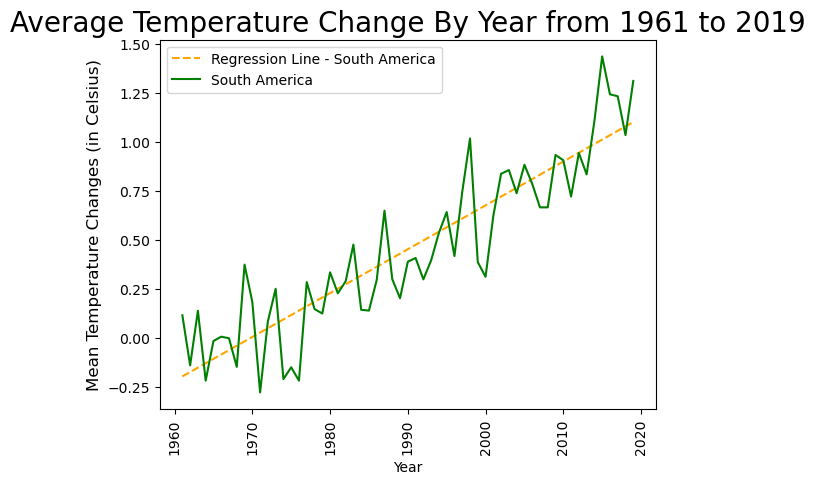

In [43]:
# Convert the 'Year' column to integers by removing the 'Y' prefix
y_data2['Year'] = y_data2.index.str.replace('Y', '').astype(int)

# Linear regression for 'South America'
y2 = y_data2['South America'].values
regressor2 = LinearRegression()
regressor2.fit(X, y2)

m2 = regressor2.coef_[0]
b2 = regressor2.intercept_

# Print the equation of the line
print(f"The equation of the line is: y = {m2:.2f}x + {b2:.2f}")

y2_pred = regressor2.predict(X)
plt.plot(y_data2['Year'], y2_pred, label='Regression Line - South America', color='orange', linestyle='dashed')

# Plot the data points for 'South America'
plt.plot(y_data2['Year'], y_data2['South America'], label='South America', color='green')

plt.xlabel('Year')
plt.ylabel("Mean Temperature Changes (in Celsius)", fontsize = 12)
plt.title("Average Temperature Change By Year from 1961 to 2019", fontsize = 20)
plt.xticks(rotation=90)
plt.legend()
plt.show()

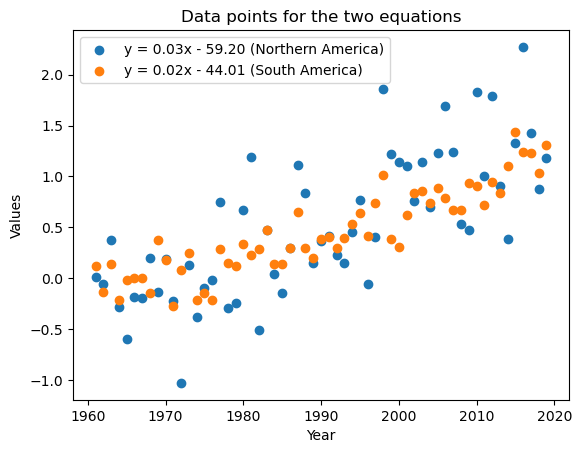

P-values for comparing slopes: [4.51647188e-02 8.99626419e-01 5.44214614e-02 1.00735711e-01
 3.61581632e-12 2.16681768e-03 2.00970077e-03 1.47257484e-03
 2.15244060e-10 4.71626871e-01 8.07577942e-01 5.21551390e-27
 2.25512150e-02 5.36459702e-03 8.63427134e-01 1.36095041e-01
 8.22092645e-06 1.60282084e-08 7.27412539e-07 1.65237747e-03
 5.49918225e-19 3.20399138e-18 3.69201137e-01 3.71263358e-02
 4.58027431e-05 4.42861827e-01 8.22092645e-06 1.45747157e-07
 1.33497053e-01 2.51494932e-01 4.78977895e-01 8.91572360e-02
 2.93509916e-04 6.57537752e-02 5.23204987e-01 2.15236354e-09
 2.91610364e-06 1.14398501e-15 3.00065823e-15 3.63779834e-15
 3.36590227e-06 7.47947755e-02 9.52679865e-03 1.81664206e-01
 1.03673701e-03 2.52776974e-17 2.49292681e-08 1.87699669e-02
 4.56880649e-09 1.01991093e-17 1.32066178e-02 1.47981000e-15
 9.76939172e-01 6.06619527e-16 3.81932269e-02 7.62069152e-21
 1.42383002e-01 6.60466188e-03 1.76407002e-02]
P-values for comparing intercepts: [8.56787985e-145 3.34874476e-144 

In [44]:
#Statistical Analysis Testing
# Visualize the data points for both equations
plt.scatter(X, y1, label='y = 0.03x - 59.20 (Northern America)')
plt.scatter(X, y2, label='y = 0.02x - 44.01 (South America)')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Data points for the two equations')
plt.show()
# Perform statistical analysis (t-test) to compare slopes (coefficients for x)
slope_t_stat, slope_p_value = ttest_ind(y1 - b1 - m1*X, y2 - b2 - m2*X)

# Perform statistical analysis (t-test) to compare intercepts
intercept_t_stat, intercept_p_value = ttest_ind(y1 - m1*X, y2 - m2*X)

print(f"P-values for comparing slopes: {slope_p_value}")
print(f"P-values for comparing intercepts: {intercept_p_value}")

In [45]:
significance_level = 0.05
significant_slope_mask = np.array(slope_p_value) < significance_level
significant_intercept_mask = np.array(intercept_p_value) < significance_level

significant_slope_p_values = np.array(slope_p_value)[significant_slope_mask]
significant_intercept_p_values = np.array(intercept_p_value)[significant_intercept_mask]

print("Significant p-values for comparing slopes:", significant_slope_p_values)
print("Significant p-values for comparing intercepts:", significant_intercept_p_values)

Significant p-values for comparing slopes: [4.51647188e-02 3.61581632e-12 2.16681768e-03 2.00970077e-03
 1.47257484e-03 2.15244060e-10 5.21551390e-27 2.25512150e-02
 5.36459702e-03 8.22092645e-06 1.60282084e-08 7.27412539e-07
 1.65237747e-03 5.49918225e-19 3.20399138e-18 3.71263358e-02
 4.58027431e-05 8.22092645e-06 1.45747157e-07 2.93509916e-04
 2.15236354e-09 2.91610364e-06 1.14398501e-15 3.00065823e-15
 3.63779834e-15 3.36590227e-06 9.52679865e-03 1.03673701e-03
 2.52776974e-17 2.49292681e-08 1.87699669e-02 4.56880649e-09
 1.01991093e-17 1.32066178e-02 1.47981000e-15 6.06619527e-16
 3.81932269e-02 7.62069152e-21 6.60466188e-03 1.76407002e-02]
Significant p-values for comparing intercepts: [8.56787985e-145 3.34874476e-144 1.07215271e-143 1.08227468e-144
 2.43929660e-146 4.26282229e-145 4.19949668e-145 2.50706112e-143
 3.98279953e-146 1.95226539e-144 2.64502363e-144 5.26689660e-148
 7.15253713e-145 5.14064549e-145 2.76848946e-144 8.06811070e-144
 6.27940332e-143 6.86128186e-146 1.1504

In [46]:
m_data1 = m_data.dropna(axis=0, how='all')
m_data1 = m_data1.drop(['Area Code','Months Code','Element Code','Element','Unit'], axis=1)
#Monthly Mean Temperature Changes (Raw)
m_data1.head()

,Area,Months,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,YearSpanAvg
0,South America,January,0.015,-0.154,-0.022,0.227,-0.292,0.299,-0.142,-0.149,...,0.702,0.662,1.050,0.963,1.149,1.571,1.157,0.914,1.230,0.431
2,South America,February,-0.128,-0.021,-0.131,0.180,0.059,-0.306,-0.136,-0.251,...,0.467,0.541,0.746,0.580,0.837,1.774,0.972,0.825,1.149,0.376
4,South America,March,-0.098,0.192,-0.086,-0.261,-0.523,0.019,-0.317,-0.468,...,0.318,0.676,0.601,0.494,1.122,1.357,0.922,0.988,0.952,0.414
6,South America,April,0.064,-0.109,0.305,0.204,-0.148,0.269,0.293,-0.750,...,0.942,0.937,1.024,1.022,1.587,1.491,1.015,1.548,1.609,0.587
8,South America,May,0.499,-0.406,-0.152,0.045,-0.186,0.209,0.901,-0.968,...,0.529,0.993,0.961,0.947,1.384,0.740,1.472,1.190,1.479,0.448


In [47]:
#Splitting DataFrame into two separate frames based on region
m_data_na = m_data1[m_data1['Area']=='Northern America']
m_data_sa = m_data1[m_data1['Area']=='South America']
#North America Monthly Mean Temp Changes
m_data_na.head()

,Area,Months,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,YearSpanAvg
32,Northern America,January,0.699,-0.515,-0.618,1.222,0.084,-2.178,1.111,-0.465,...,1.960,2.216,2.024,2.418,1.927,4.029,3.629,2.110,1.717,1.001
34,Northern America,February,0.684,-0.845,0.644,0.689,-1.880,0.057,-1.604,-0.083,...,0.358,3.370,1.569,-0.589,-0.797,3.244,3.050,0.739,-0.535,0.648
36,Northern America,March,-0.243,0.481,-0.052,-2.683,-0.465,0.832,-0.347,2.046,...,0.753,2.997,1.237,-0.694,1.957,3.381,1.193,2.016,2.248,0.931
38,Northern America,April,-0.700,-0.152,0.896,-0.786,0.347,-0.847,-0.936,0.142,...,-0.148,1.815,-0.829,0.122,1.187,1.258,1.350,-0.739,1.149,0.459
40,Northern America,May,-0.600,-0.259,-0.136,-0.023,0.118,-0.325,-0.878,-0.529,...,0.237,1.523,0.252,1.042,1.190,1.486,0.989,1.549,0.695,0.344


In [48]:
#Transpose column headers and make new by month (NA)
m_data_na1 = m_data_na.transpose()
m_data_na1 = m_data_na1.drop(['Area','Months',])
m_data_na1.columns = ['January', 
                    'February','March','April','May','June','July','August','September','October','November','December']
#m_data_na1.head()

In [49]:
m_data_naavg = m_data_na1.loc['YearSpanAvg',:]
m_data_naavg.head()

January     1.001
February    0.648
March       0.931
April       0.459
May         0.344
Name: YearSpanAvg, dtype: object

In [50]:
#South America Mean Temp Changes(Raw)
#m_data_sa.head()

In [51]:
#Transpose column headers and make new by month (SA)
m_data_sa1 = m_data_sa.transpose()
m_data_sa1 = m_data_sa1.drop(['Area','Months'])
m_data_sa1.columns = ['January', 
                    'February','March','April','May','June','July','August','September','October','November','December']
#m_data_sa1.head()

In [52]:
m_data_saavg = m_data_sa1.loc['YearSpanAvg',:]
m_data_saavg.head()

January     0.431
February    0.376
March       0.414
April       0.587
May         0.448
Name: YearSpanAvg, dtype: object

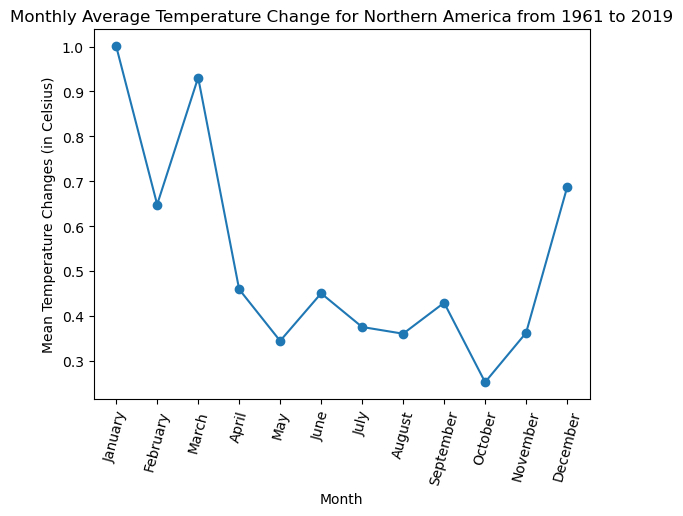

In [53]:
#plot the monthly average temperature change for North America from 1961 to 2019 (Summary of average means of mean changes by month)
yNA = m_data_naavg
xNA = range(len(y))


plt.plot(x,y, marker="o")
plt.xlabel('Month')
plt.ylabel("Mean Temperature Changes (in Celsius)")
plt.title("Monthly Average Temperature Change for Northern America from 1961 to 2019")

tick_locations = [value for value in x]
plt.xticks(tick_locations, ["January","February","March","April","May","June", 
                            "July", "August", "September", "October", "November", "December"], rotation = 75)
plt.show()

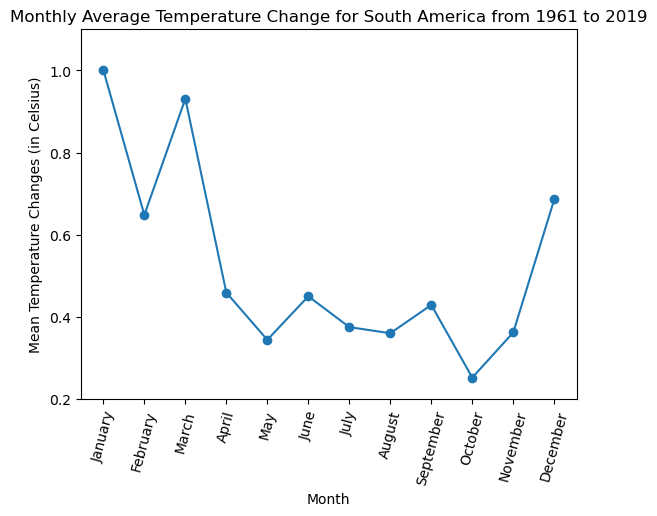

In [54]:
#plot the monthly average temperature change for South America from 1961 to 2019 (Summary of average means of mean changes by month)
ySA = m_data_saavg
xSA = range(len(y))


plt.plot(x,y, marker="o")
plt.xlabel('Month')
plt.ylabel("Mean Temperature Changes (in Celsius)")
plt.title("Monthly Average Temperature Change for South America from 1961 to 2019")
plt.ylim(0.2, 1.1)

tick_locations = [value for value in x]
plt.xticks(tick_locations, ["January","February","March","April","May","June", 
                            "July", "August", "September", "October", "November", "December"], rotation = 75)
plt.show()

In [55]:



#plt.xlabel('Year')
#plt.ylabel("Mean Temperature Changes (in Celsius)")
#plt.title("Average Temperature Change Per Month for Northen America from 1961 to 2019")
#plt.xticks(tick_locations, ['Y1961','Y1962','Y1963','Y1964','Y1965','Y1966','Y1967','Y1968','Y1969','Y1970','Y1971','Y1972','Y1973','Y1974','Y1975','Y1976','Y1977','Y1978','Y1979','Y1980','Y1981','Y1982','Y1983','Y1984','Y1985','Y1986','Y1987','Y1988','Y1989','Y1990','Y1991','Y1992','Y1993','Y1994','Y1995','Y1996','Y1997','Y1998','Y1999','Y2000','Y2001','Y2002','Y2003','Y2004','Y2005','Y2006','Y2007','Y2008','Y2009','Y2010','Y2011','Y2012','Y2013','Y2014','Y2015','Y2016','Y2017','Y2018','Y2019'], rotation = 75)

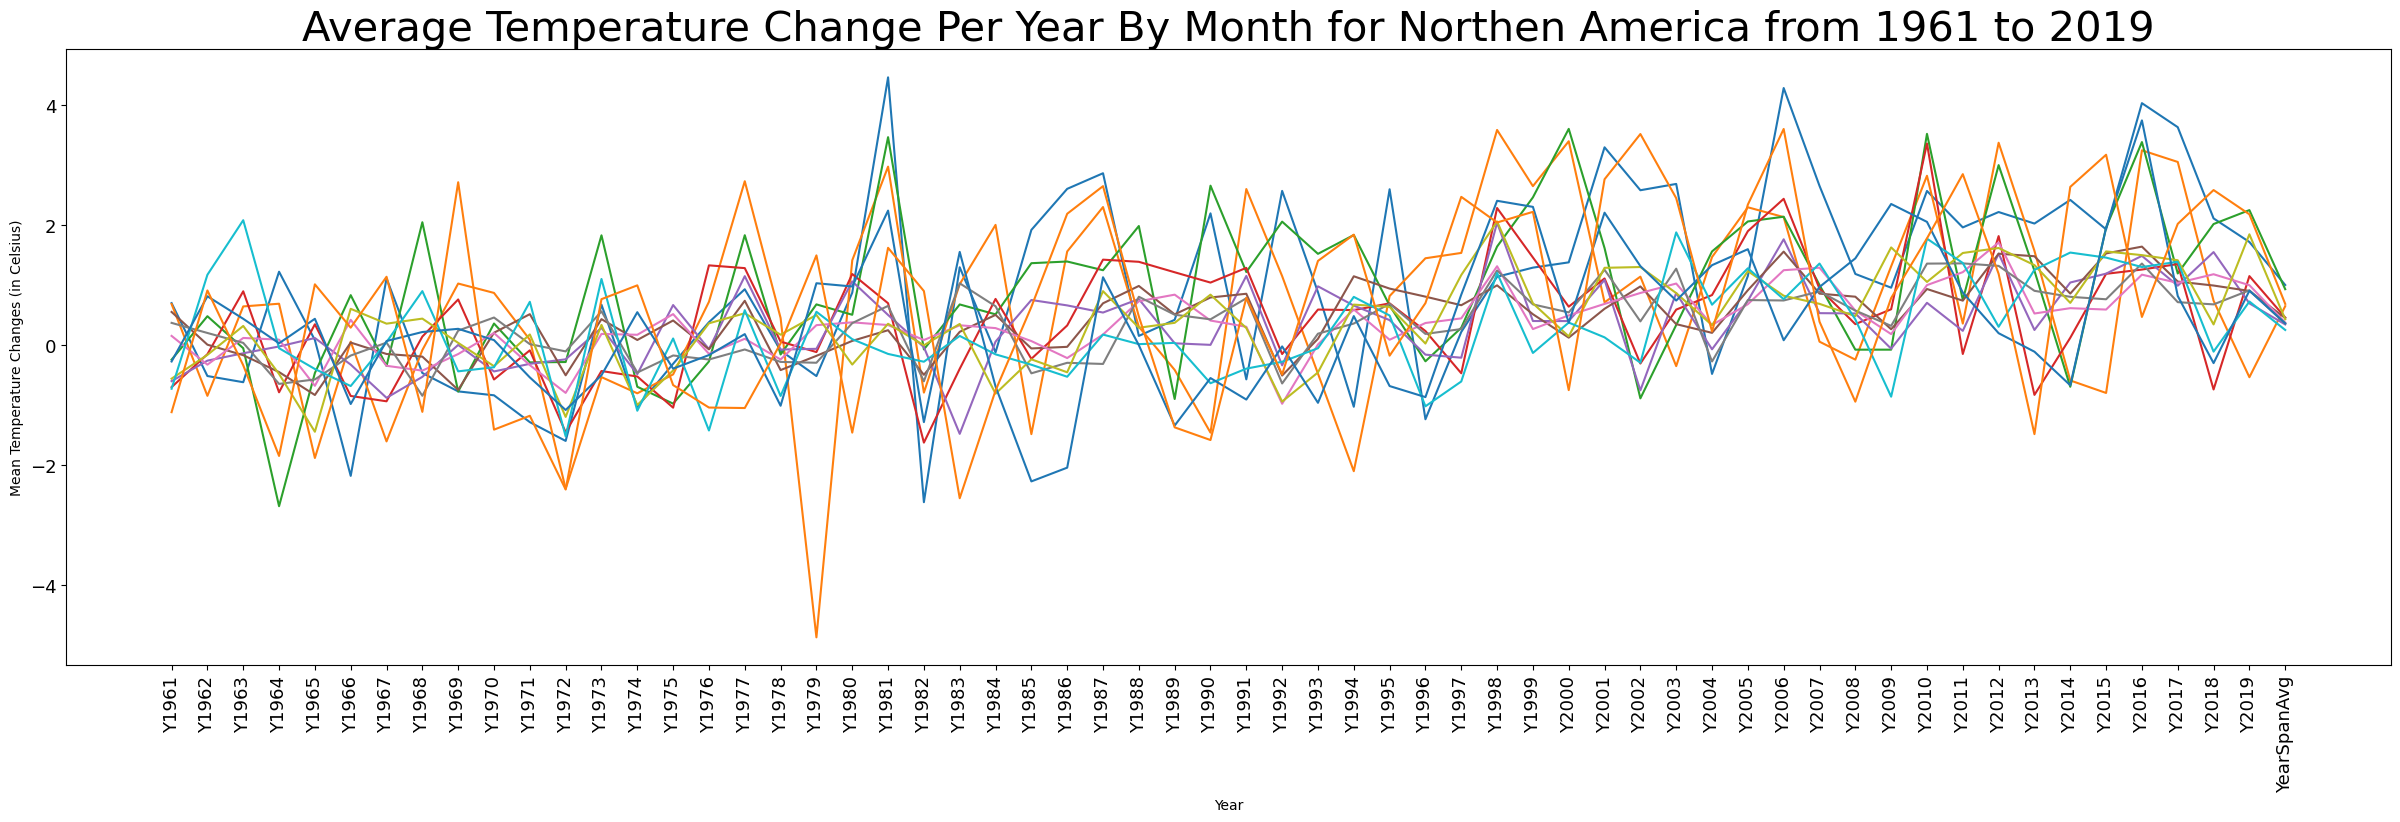

In [56]:
#Need to run these by for ideas before final. get Rid of yearSpanavg at end
fig = plt.figure(figsize=(30, 8))
plt.plot(m_data_na1["January"])
plt.plot(m_data_na1["February"])
plt.plot(m_data_na1["March"])
plt.plot(m_data_na1["April"])
plt.plot(m_data_na1["May"])
plt.plot(m_data_na1["June"])
plt.plot(m_data_na1["July"])
plt.plot(m_data_na1["August"])
plt.plot(m_data_na1["September"])
plt.plot(m_data_na1["October"])
plt.plot(m_data_na1["November"])
plt.plot(m_data_na1["December"])
plt.xlabel('Year')
plt.ylabel("Mean Temperature Changes (in Celsius)")
plt.title("Average Temperature Change Per Year By Month for Northen America from 1961 to 2019",fontsize=30)
plt.xticks(rotation=90)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

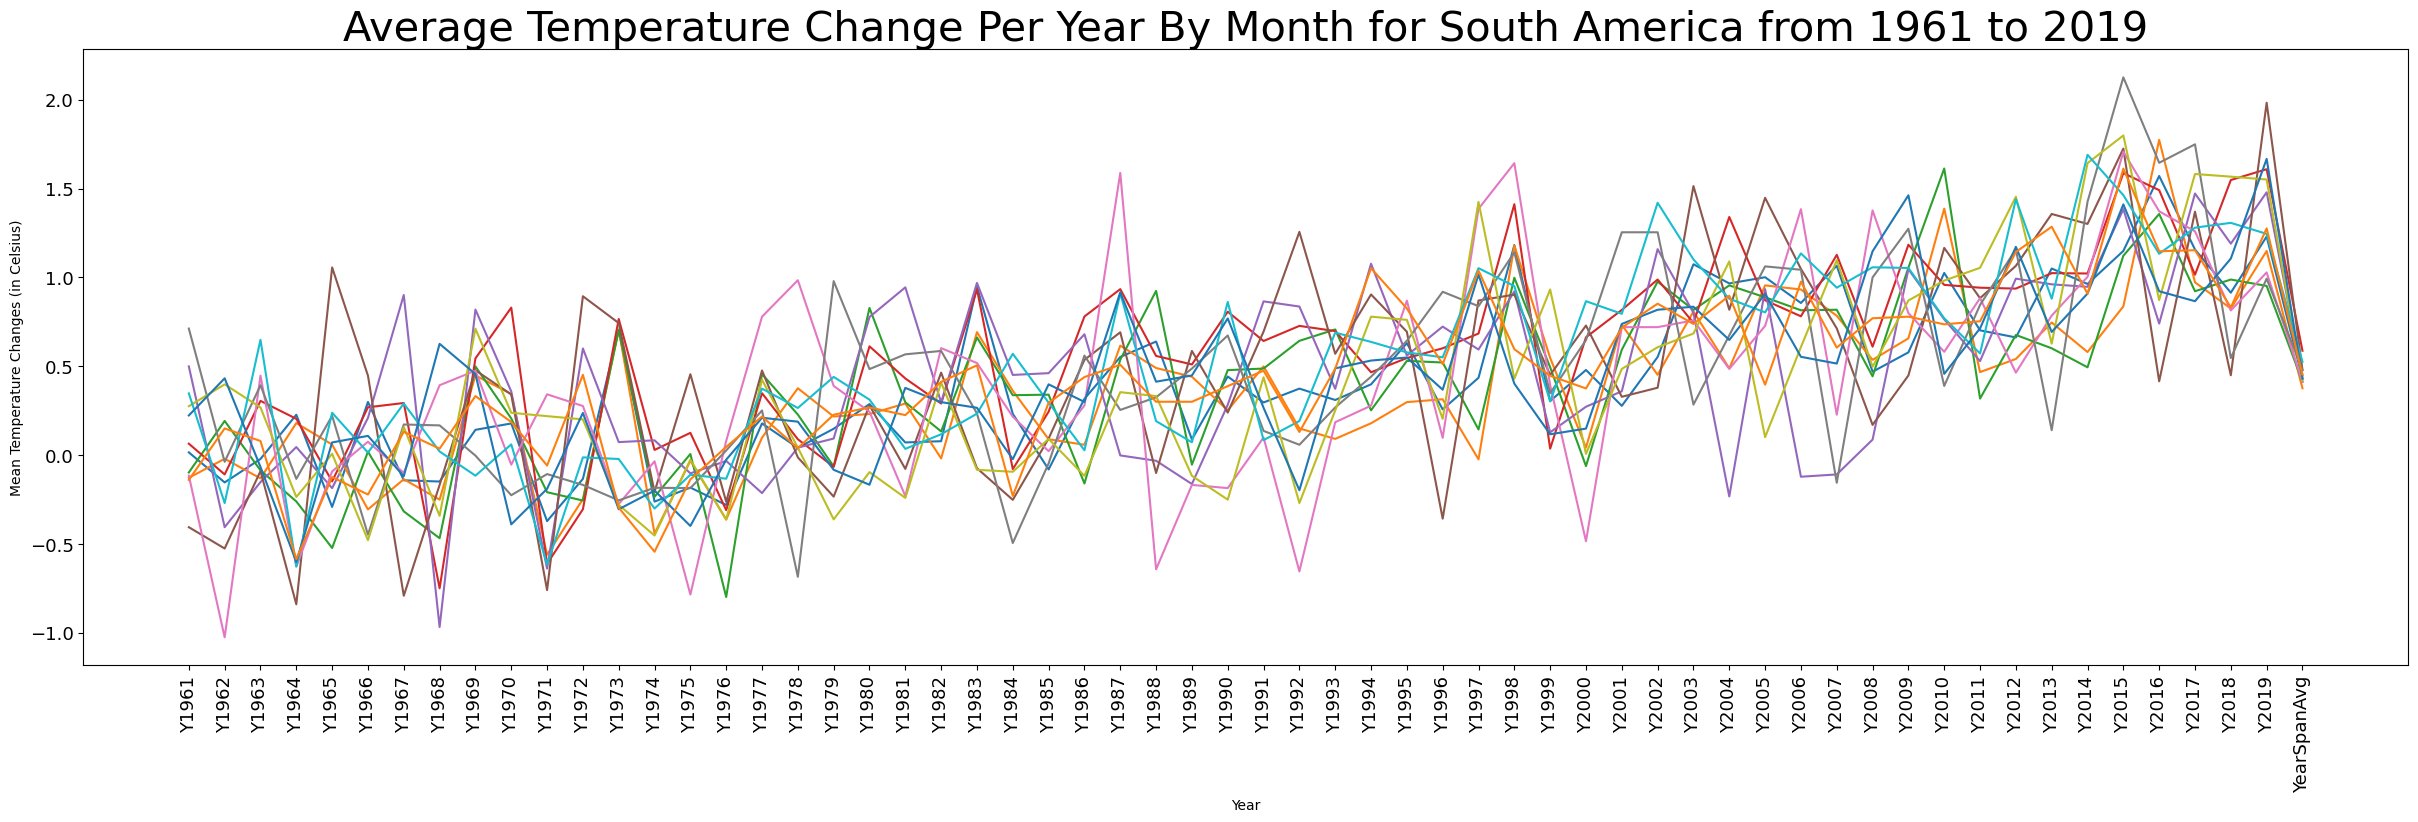

In [34]:
#Need to run these by for ideas before final. get Rid of yearSpanavg at end
fig = plt.figure(figsize=(30, 8))
plt.plot(m_data_sa1["January"])
plt.plot(m_data_sa1["February"])
plt.plot(m_data_sa1["March"])
plt.plot(m_data_sa1["April"])
plt.plot(m_data_sa1["May"])
plt.plot(m_data_sa1["June"])
plt.plot(m_data_sa1["July"])
plt.plot(m_data_sa1["August"])
plt.plot(m_data_sa1["September"])
plt.plot(m_data_sa1["October"])
plt.plot(m_data_sa1["November"])
plt.plot(m_data_sa1["December"])
plt.xlabel('Year')
plt.ylabel("Mean Temperature Changes (in Celsius)")
plt.title("Average Temperature Change Per Year By Month for South America from 1961 to 2019",fontsize=30)
plt.xticks(rotation=90)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()